In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import japanize_matplotlib
import statsmodels.api as sm
sns.set()

#RMSE計算
from sklearn.metrics import mean_squared_error

In [10]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools

In [11]:
df_ice = pd.read_csv("icecream.csv", encoding = "shift-jis", header=1)
df_ice.set_index(pd.date_range('2003-01-01', '2012-12-31', freq='M'), inplace=True)
df_ice.head()

,年,月,アイスクリーム
2003-01-31,2003,1,331
2003-02-28,2003,2,268
2003-03-31,2003,3,365
2003-04-30,2003,4,492
2003-05-31,2003,5,632


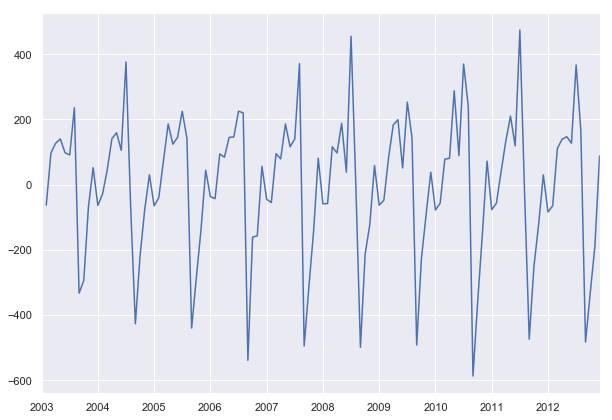

In [12]:
# 差分系列
df_ice["アイスクリーム"].diff().plot(figsize=(10,7))

In [13]:
y_diff = df_ice["アイスクリーム"].diff().dropna()
y_diff

2003-02-28    -63.0
2003-03-31     97.0
2003-04-30    127.0
2003-05-31    140.0
2003-06-30     98.0
2003-07-31     91.0
2003-08-31    236.0
2003-09-30   -333.0
2003-10-31   -294.0
2003-11-30    -67.0
2003-12-31     52.0
2004-01-31    -64.0
2004-02-29    -29.0
2004-03-31     45.0
2004-04-30    141.0
2004-05-31    159.0
2004-06-30    105.0
2004-07-31    376.0
2004-08-31    -68.0
2004-09-30   -427.0
2004-10-31   -219.0
2004-11-30    -76.0
2004-12-31     30.0
2005-01-31    -65.0
2005-02-28    -40.0
2005-03-31     74.0
2005-04-30    186.0
2005-05-31    124.0
2005-06-30    145.0
2005-07-31    225.0
              ...  
2010-07-31    370.0
2010-08-31    240.0
2010-09-30   -587.0
2010-10-31   -360.0
2010-11-30   -153.0
2010-12-31     72.0
2011-01-31    -77.0
2011-02-28    -57.0
2011-03-31     40.0
2011-04-30    133.0
2011-05-31    210.0
2011-06-30    119.0
2011-07-31    474.0
2011-08-31    -24.0
2011-09-30   -474.0
2011-10-31   -251.0
2011-11-30   -123.0
2011-12-31     30.0
2012-01-31    -84.0


In [14]:
#　次数選択の指標にAICとBICを選択
info_criteria = stattools.arma_order_select_ic(y_diff , ic = ["aic" , "bic"])

#AICとBICが最小になる次数をそれぞれ表示
info_criteria.aic_min_order , info_criteria.bic_min_order

/Users/yuza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:676: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/Users/yuza/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/yuza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/Users/yuza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


((2, 2), (2, 2))

In [15]:
# AIC 及び BIC　の観点で次数（2,2)が最適であることが分かる
# ARMAモデルの当てはめを行う

from statsmodels.tsa.arima_model import ARMA

# p = 2, q = 2のARMAモデルのインスタンス を生成
model = ARMA(y_diff , (2,2))

# y_diffに対してモデルを当てはめる
results22 = model.fit()

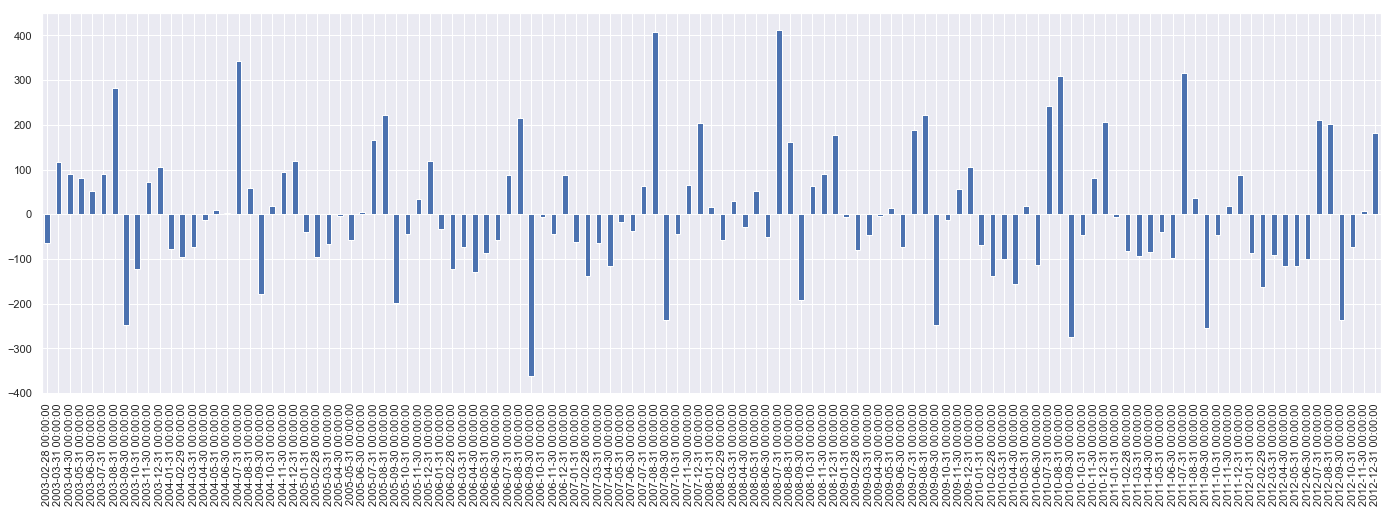

In [16]:
#残渣
results22.resid

#残渣のplot
results22.resid.plot(kind='bar',figsize=(24,7))

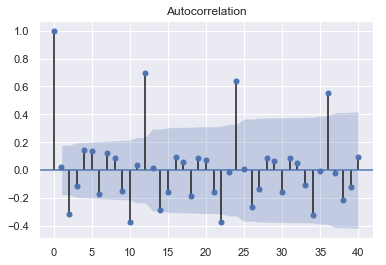

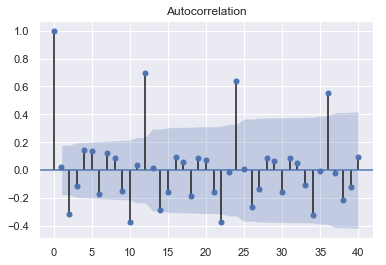

In [17]:
#次に残渣の自己相関の確認を行う
from statsmodels.graphics import tsaplots

tsaplots.plot_acf(results22.resid , lags = 40)

/Users/yuza/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


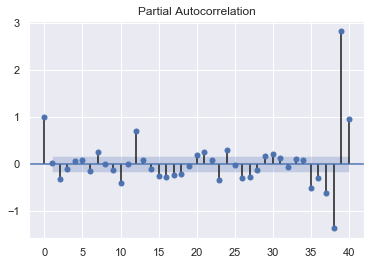

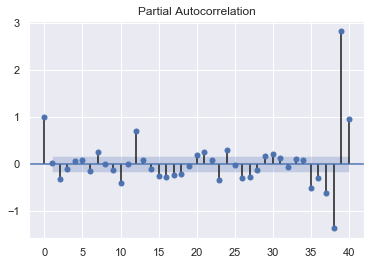

In [18]:
#次に残渣の偏自己相関の確認を行う
from statsmodels.graphics import tsaplots

tsaplots.plot_pacf(results22.resid , lags = 40)

In [21]:
# かばん検定を行う：結果、ラグ2以降、自己相関がすべて0という帰無仮説は棄却できた（つまり少なくとも1つは自己相関をもつラグが存在）
lbvalues, pvalues = sm.stats.acorr_ljungbox(results22.resid,lags=12)

lag = 1
for lb, p in zip(lbvalues, pvalues):
    print(lag, lb, p)
    lag += 1

1 0.059761478961691296 0.8068733305753493
2 12.505286023081187 0.0019253586603340776
3 14.065278092903188 0.002817631268556244
4 16.644952516428344 0.0022653002415295347
5 19.00723820860266 0.0019161789500267688
6 22.78154219108985 0.0008730460936102598
7 24.799654610226586 0.0008234063133403437
8 25.833115597378676 0.0011216243737330396
9 28.742145440933008 0.0007162137313704422
10 46.85489502932347 1.0034179693604047e-06
11 47.03593737965418 2.119142624917266e-06
12 112.90733485955954 1.5894704219180795e-18


/Users/yuza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


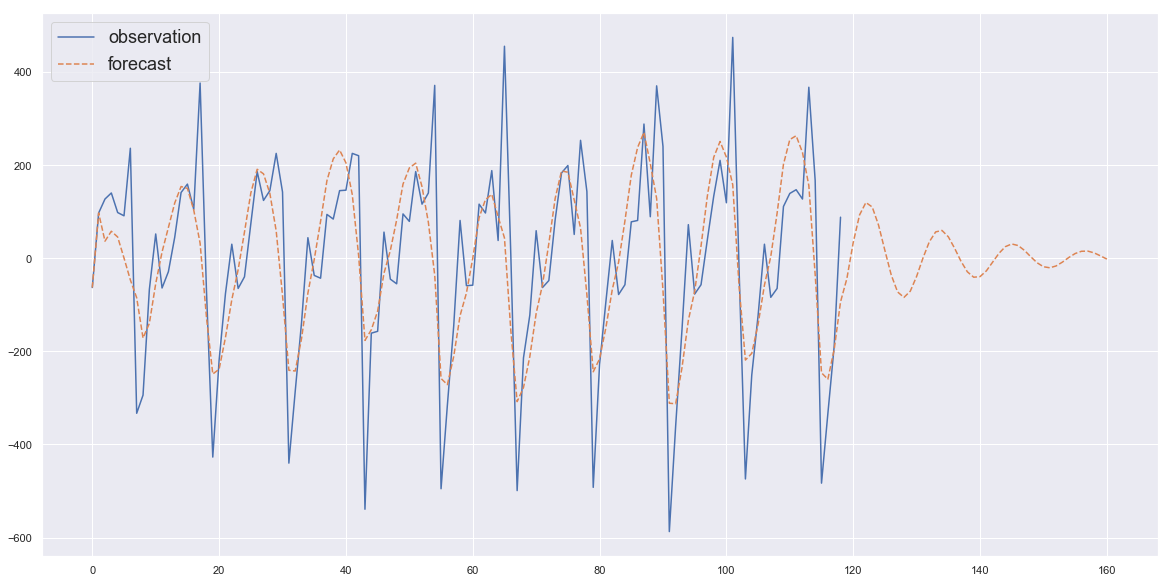

In [22]:
# 原系列の表示
plt.figure(figsize = (20,10))

plt.plot(y_diff.values, label = "observation")

# 0時点から1時点まではfitting結果がないため原系列を使用する
plt.plot(np.hstack([y_diff.values[:2],#0-1はfitting値がないため原系列を使う
                    results22.fittedvalues[2:],# fitting値2-118はfittingの結果
                  results22.predict(119,160,dynamic = True)]),# 119-160は予測結果
        "--" , label = "forecast")

plt.legend(loc = "upper left",fontsize = 18)

In [23]:
results22.fittedvalues[2:]

2003-04-30     36.551725
2003-05-31     57.841588
2003-06-30     45.454358
2003-07-31      0.354589
2003-08-31    -46.581881
2003-09-30    -84.952708
2003-10-31   -171.451981
2003-11-30   -139.895313
2003-12-31    -54.604622
2004-01-31     13.248750
2004-02-29     66.111487
2004-03-31    118.501650
2004-04-30    153.846797
2004-05-31    149.885256
2004-06-30    103.182292
2004-07-31     32.324621
2004-08-31   -126.184429
2004-09-30   -248.771474
2004-10-31   -238.267457
2004-11-30   -170.288371
2004-12-31    -89.207700
2005-01-31    -24.665056
2005-02-28     56.219438
2005-03-31    139.919220
2005-04-30    190.881726
2005-05-31    181.068254
2005-06-30    139.215052
2005-07-31     58.613847
2005-08-31    -80.178339
2005-09-30   -240.647697
                 ...    
2010-07-31    128.028250
2010-08-31    -69.492642
2010-09-30   -311.402266
2010-10-31   -312.575124
2010-11-30   -234.929138
2010-12-31   -133.487683
2011-01-31    -70.815193
2011-02-28     26.084536
2011-03-31    133.497662


In [24]:
np.hstack([y_diff.values[:2],results22.fittedvalues[2:]])

array([-6.30000000e+01,  9.70000000e+01,  3.65517246e+01,  5.78415883e+01,
        4.54543576e+01,  3.54588995e-01, -4.65818811e+01, -8.49527075e+01,
       -1.71451981e+02, -1.39895313e+02, -5.46046221e+01,  1.32487498e+01,
        6.61114874e+01,  1.18501650e+02,  1.53846797e+02,  1.49885256e+02,
        1.03182292e+02,  3.23246213e+01, -1.26184429e+02, -2.48771474e+02,
       -2.38267457e+02, -1.70288371e+02, -8.92077002e+01, -2.46650564e+01,
        5.62194377e+01,  1.39919220e+02,  1.90881726e+02,  1.81068254e+02,
        1.39215052e+02,  5.86138468e+01, -8.01783389e+01, -2.40647697e+02,
       -2.42237854e+02, -1.72399007e+02, -7.50359142e+01, -2.87964337e+00,
        7.90563933e+01,  1.66262979e+02,  2.13191060e+02,  2.32301065e+02,
        2.04655069e+02,  1.36570609e+02,  5.50294989e+00, -1.76544754e+02,
       -1.53730390e+02, -1.13641838e+02, -3.22283097e+01,  1.64019121e+01,
        8.22482896e+01,  1.59077457e+02,  1.93775972e+02,  2.04024640e+02,
        1.53356597e+02,  

In [25]:
results22.predict(119,160,dynamic = True)

2012-12-31    -95.111772
2013-01-31     21.754407
2013-02-28    119.377243
2013-03-31    172.617189
2013-04-30    171.623783
2013-05-31    122.852106
2013-06-30     45.398425
2013-07-31    -35.785933
2013-08-31    -97.547021
2013-09-30   -124.805933
2013-10-31   -113.860698
2013-11-30    -72.126930
2013-12-31    -14.795443
2014-01-31     40.306254
2014-02-28     78.005404
2014-03-31     89.729524
2014-04-30     75.154685
2014-05-31     41.356720
2014-06-30     -0.012580
2014-07-31    -36.508783
2014-08-31    -58.469141
2014-09-30    -61.401026
2014-10-31    -46.650869
2014-11-30    -20.362156
2014-12-31      8.790915
2015-01-31     32.320173
2015-02-28     44.278705
2015-03-31     42.636361
2015-04-30     29.402029
2015-05-31      9.601181
2015-06-30    -10.474677
2015-07-31    -25.173620
2015-08-31    -30.992822
2015-09-30    -27.314457
2015-10-31    -16.250085
2015-11-30     -1.738613
2015-12-31     11.764597
2016-01-31     20.593914
2016-02-29     22.809747
2016-03-31     18.544982
